In [2]:
%%time
from xcube.core.store import new_data_store
from xcube_stac.utils import reproject_bbox

credentials = {
    "key": "O0M0CUQIDQO9TDZ4D8NR",
    "secret": "qPUyXs9G6j8on6MY5KPhQNHuA5uZTqxEscrbBCGx",
}
store = new_data_store("stac-cdse", stack_mode=True, **credentials)

CPU times: user 4.89 s, sys: 539 ms, total: 5.43 s
Wall time: 3.88 s


In [3]:
%%time
bbox = [9.7, 53.4, 10.3, 53.7]
crs_target = "EPSG:32632"
bbox_utm = reproject_bbox(bbox, "EPSG:4326", crs_target)
time_range = ["2020-07-15", "2020-08-01"]
ds = store.open_data(
    data_id="sentinel-2-l2a",
    bbox=bbox_utm,
    time_range=time_range,
    spatial_res=10,
    crs=crs_target,
    asset_names=["B02", "B03", "B04", "SCL"],
    apply_scaling=True,
)
ds

2025-04-07 11:19:52.577265 B02
2025-04-07 11:19:54.980763 B03
2025-04-07 11:19:57.235162 B04
2025-04-07 11:19:59.251298 SCL
CPU times: user 3.84 s, sys: 363 ms, total: 4.2 s
Wall time: 9.91 s


<xarray.Dataset> Size: 4GB
Dimensions:      (time: 7, y: 3733, x: 4425)
Coordinates:
  * time         (time) datetime64[ns] 56B 2020-07-16T10:40:31.024000 ... 202...
  * x            (x) float64 35kB 5.442e+05 5.442e+05 ... 5.884e+05 5.884e+05
  * y            (y) float64 30kB 5.953e+06 5.953e+06 ... 5.915e+06 5.915e+06
    spatial_ref  int64 8B 0
Data variables:
    B02          (time, y, x) float64 925MB dask.array<chunksize=(1, 384, 698), meta=np.ndarray>
    B03          (time, y, x) float64 925MB dask.array<chunksize=(1, 384, 698), meta=np.ndarray>
    B04          (time, y, x) float64 925MB dask.array<chunksize=(1, 384, 698), meta=np.ndarray>
    SCL          (time, y, x) float64 925MB dask.array<chunksize=(1, 1024, 1024), meta=np.ndarray>
Attributes: (12/13)
    geospatial_lon_units:       degrees_east
    geospatial_lon_min:         9.664547893276632
    geospatial_lon_max:         10.340257947731828
    geospatial_lon_resolution:  0.00015303341248618096
    geospatial_lat_units:       degrees_north
    geospatial_lat_min:         53.3850382463852
    ...                         ...
    geospatial_lat_resolution:  8.860889284534323e-05
    geospatial_bounds_crs:      CRS84
    geospatial_bounds:          POLYGON((9.664547893276632 53.3850382463852, ...
    date_modified:              2025-04-07T11:19:52.636863
    stac_catalog_url:           https://stac.dataspace.copernicus.eu/v1
    stac_item_ids:              {'2020-07-16T10:40:31.024000': ['S2A_MSIL2A_2...

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.164722 to fit


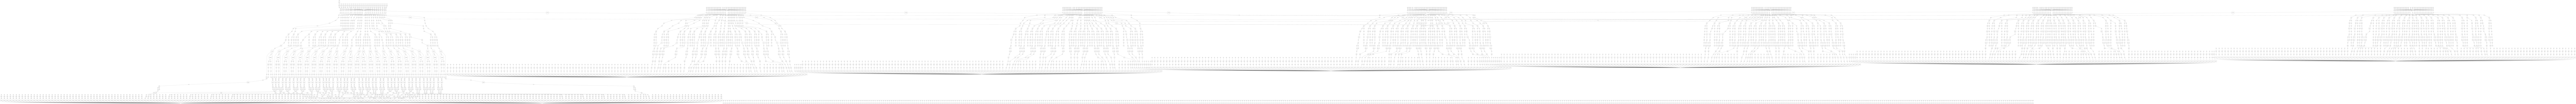

In [5]:
ds.B02.isel(time=0)[:384, :698].data.visualize()

In [ ]:
%%time
ds.isel(time=0).compute()